In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohansacharya/graduate-admissions")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 9.64k/9.64k [00:00<00:00, 521kB/s]

Extracting files...
Path to dataset files: C:\Users\itsam\.cache\kagglehub\datasets\mohansacharya\graduate-admissions\versions\2


In [166]:
import pandas as pd
import numpy as np

In [167]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [168]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [169]:
  df.shape

(500, 9)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [171]:
df.duplicated().sum()

0

In [172]:
df.drop(columns=['Serial No.'] , inplace=True)

In [173]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [174]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train ,X_test , y_train , y_test = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=42)

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [178]:
scaler = MinMaxScaler()

In [179]:
X_train = scaler.fit_transform(X_train)

In [180]:
X_test = scaler.transform(X_test)

In [181]:
X_train

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [182]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [189]:
model = Sequential()

In [190]:
model.add(Dense(7 , activation='relu', input_dim=7))
model.add(Dense(7 , activation='relu' , input_dim=7))
model.add(Dense(1, activation='linear'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [191]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [192]:
model.compile(loss='mean_squared_error' , optimizer='Adam', metrics=['r2_score'])

In [193]:
history = model.fit(X_train , y_train , epochs=100 , validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.4295 - r2_score: -22.2929 - val_loss: 0.3645 - val_r2_score: -15.6750
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3270 - r2_score: -15.8531 - val_loss: 0.2645 - val_r2_score: -11.1033
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2380 - r2_score: -12.2965 - val_loss: 0.1649 - val_r2_score: -6.5450
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1506 - r2_score: -6.9393 - val_loss: 0.0915 - val_r2_score: -3.1846
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0963 - r2_score: -4.2742 - val_loss: 0.0582 - val_r2_score: -1.6608
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0601 - r2_score: -2.1529 - val_loss: 0.0448 - val_r2_score: -1.0518
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0481 - r2_score: -1.7217 - val_loss: 0.0340 - val_r2_score: -0.5557
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0328 - r2_score: -0.782

In [194]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 


In [195]:
from sklearn.metrics import r2_score

In [196]:
r2_score(y_test,y_pred)

0.802424223541605

In [197]:
import matplotlib.pyplot as plt

In [198]:
history.history

{'loss': [0.4064866006374359,
  0.31372421979904175,
  0.21998175978660583,
  0.13540205359458923,
  0.08442911505699158,
  0.059515733271837234,
  0.04676852375268936,
  0.03592926636338234,
  0.02870309352874756,
  0.024331895634531975,
  0.020398927852511406,
  0.016558269038796425,
  0.01363606471568346,
  0.011339494027197361,
  0.009889209643006325,
  0.00902737770229578,
  0.00840790756046772,
  0.008186996914446354,
  0.007923165336251259,
  0.0075730993412435055,
  0.007363634649664164,
  0.007207079324871302,
  0.007079658564180136,
  0.006937080062925816,
  0.006877532694488764,
  0.006739127449691296,
  0.006619531661272049,
  0.006484278943389654,
  0.006417439319193363,
  0.006315763108432293,
  0.006293354090303183,
  0.006192144937813282,
  0.006047169212251902,
  0.00605541979894042,
  0.00607495941221714,
  0.006021718494594097,
  0.005937912501394749,
  0.0057859597727656364,
  0.005730821751058102,
  0.005614368245005608,
  0.005594730377197266,
  0.0055333026684820

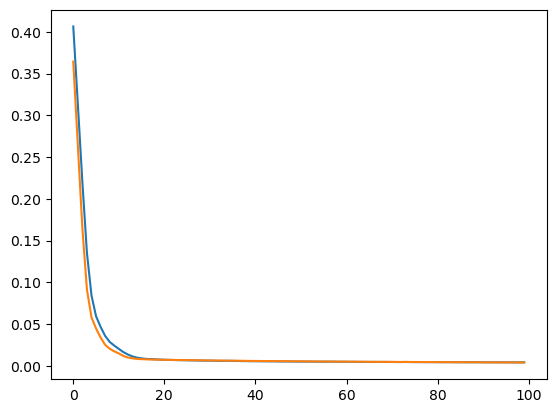

In [199]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

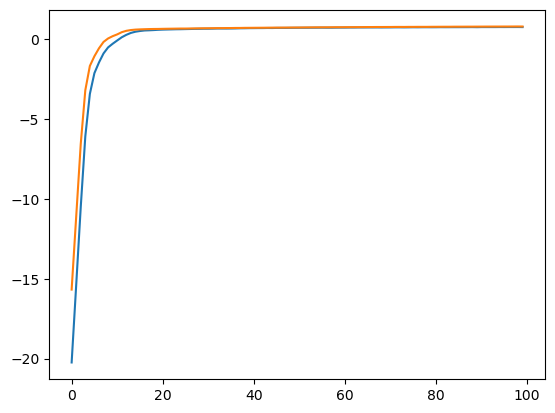

In [200]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])